<a href="https://colab.research.google.com/github/destsummer/Bioinformatics-Student-Portfolio/blob/master/afaulkner_keras_gaussians_homework_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building and Understanding Neural Networks with Keras

This corresponds to a homework exercise introducing neural networks using the Keras package in a Python Notebook environment. Make a local copy of this notebook by choosing File->Save copy to Drive. Read through the notebook, and answer questions and change code as needed. Answer the questions in order. Because you will change code, results will change while you work on the notebook; therefore leave answers corresponding to initial versione of the code unchanged as you work on the code. For every change you made, please issue **Runtime->Restart and run all** within the Colab notebook. This will ensure that you obtain the same results every time you rerun the notebook.

Once finished, share the code with your instructor using a link that you generate via the SHARE button in the top right of your browser.

We start by import the required Python packages. Do not change the code - **skip** to "Our Dataset"

In [0]:
# DO NOT CHANGE THIS CODE
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
from keras import __version__

import pandas
import numpy as np

# from https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras:
# setting random number seed to make it easier to reproduce:

# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

#additions for Question 6
model = Sequential()
model.add(Activation("relu"))     
model.add(Dense(units=10))

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)


# HELPER FUNCTION FOR PLOTTING TRAINING HISTORY
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



# Our Dataset

We will create a seemingly simple dataset corresponding to two normal distributions seperated by a constant offset.

In [0]:
# DO NOT CHANGE THIS CODE
nhalf = 200
nrows=2 * nhalf   # size of dataset
ncols=2
separation = 1.0

Let's initialize a 2D Numpy array with x,y data corresponding to two normal distributions, one centered around point (0,0) the other centered around point (1,1):

In [0]:
# DO NOT CHNGE THIS CODE
mean = 0.0 # mean of normal distribution
sd = 1.0 # standard deviation
# create array with nrows rows and ncols columns 
# and fill with random numbers according to normal distribution:
X = np.random.normal(mean,sd,(nrows,ncols))
Y_int = np.random.randint(2,size=nrows)

In [0]:
# DO NOT CHANGE THIS CODE
# fill upper half of Y values with 1, lower half keeps having value 0:
for i in range(0,nrows):
    if (Y_int[i] > 0):
        X[i,0] = X[i,0] + separation
        X[i,1] = X[i,1] + separation
        Y_int[i] = 1.0

Let us visualize our dataset using the matplotlib library:

['blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red']


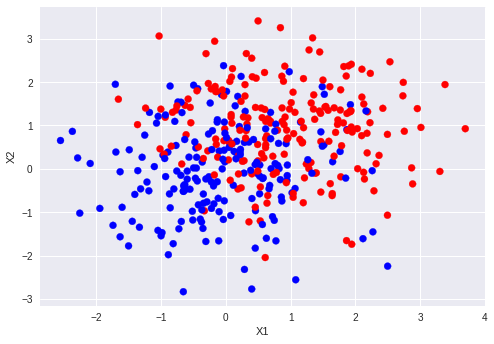

In [0]:
# DO NOT CHANGE THIS CODE
cols= ['blue' if a == 0 else 'red' for a in Y_int]
print(cols[0:10])
plt.figure(1)
plt.scatter(X[:,0],X[:,1],c=cols)
plt.ylabel("X2")
plt.xlabel("X1")
plt.show()

Here are the first rows of the 2D array X and the first elements of 1D array Y_int:



In [0]:
print("X:",X[1:10],)
print("Y_int:",Y_int[1:10])

X: [[ 0.97873798  2.2408932 ]
 [ 2.86755799  0.02272212]
 [ 1.95008842  0.84864279]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 1.44386323  1.33367433]
 [ 2.49407907  0.79484174]
 [ 1.3130677   0.14590426]]
Y_int: [0 1 1 0 0 0 1 1 1]


## 1. One-Hot Encoding

a) Use the function to_categorical from the package keras.utils.np_utils in order to convert a one-dimensional array of `Y_int` to 2D array Y with a "one-hot encoding":

In [0]:
Y= np.zeros((nrows,2)) 
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y_int)

b) Print the first ten rows of array `Y`:

In [0]:
print(Y[1:11],)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


c) Using this function for one-hot encoding, what 1-dimensional vector of length 2 corresponds to an input value of 0 (zero) and what vector corresponds to an input value of 1 (one)? (provide the answer as text, no coding needed)

* 0: 
      [ 1. 0. ]

* 1: 
      [ 0. 1. ]
      
      


## Keras Model of Dense Layers

Keras makes it easy to define a neural network model.

In [0]:
model = Sequential()

We can add individual network layers with the "add" method:

In [0]:
model.add(Dense(units=6, input_dim=2))
model.add(Activation("relu")) 
model.add(Dense(units=2))
model.add(Activation("softmax")) # means sum of output neuron activation values is 1.0

## 2. Keras Model Basics

a) Use the `summary` method of a Keras model to print summary information about the created model:

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 18        
_________________________________________________________________
activation_5 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


b) Pay attention to column "Param" in the summary information you just printed. It shows for each layer the number of numeric parameters that need to be fitted to the data. The last dense layer consists of only 2 neurons. Provide a simple formula that results in the number of parameters of that layer and that explains why the number of parameters to encode that layer is so much higher than the number of its neurons:

(6*2) + 2 = 14 

(input values * neurons in second layer) + bias for neurons in second layer = number of parameters for that layer 



## Some more background

Keras/Tensorflow correspond to highly optimized backend code. Indeed, it has a little "computer algebra" system built in, that precomputes gradients not just numerically but symbolically like you learned it in Calculus class! Using the compile method, we need to specify the following items:

* loss: loss function (the function for computing a penalty for prediction errors). The options are listed at [https://keras.io/losses/](https://keras.io/losses/)
* optimizer: The optimizer (which algorithm is used to minimize the weights of the neural network). A list of available optimizers can be found at [https://keras.io/optimizers/](https://keras.io/optimizers/)
* metrics: The "metrics": similar to loss function, but only used to communicate performance in output. A list of available metrics is provided at [https://keras.io/metrics/](https://keras.io/metrics/).


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

## 3. Specify Optimizers

We want to change the stochastic gradient descent method specified as 'SGD'.  Change the used optimizer to the method described in this paper [https://arxiv.org/abs/1412.6980v8](https://arxiv.org/abs/1412.6980v8). You can find the list of available optimizers here [https://keras.io/optimizers/](https://keras.io/optimizers/). Hint: in the compile method, you can specify the optimizer either as generated Python object or as a string, either way is fine here.

**MODIFY ABOVE CODE STARTING WITH model.compile(...)**

## 4. Training Using "fit"

The actual training of the neural network is performed using the "fit" method. Conventiently, it can split the input data into training and testing part for us using the argument `validation_split` provided as ratio between 0 and 1.

In below code starting with `model.fit`, change the validation split to correspond to 20% (so that 20% of the data is using for testing and 80% is used for training). Also change the verbosity level to 1 so that you can monitor the progress of the training:


In [0]:
history = model.fit(X, Y, validation_split=0.20, epochs=100, verbose=1); # CHANGE THIS CODE

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s 840us/step - loss: 0.6088 - acc: 0.6875 - val_loss: 0.6977 - val_acc: 0.6375
Epoch 2/100
320/320 [==============================] - 0s 75us/step - loss: 0.6017 - acc: 0.6906 - val_loss: 0.6834 - val_acc: 0.6375
Epoch 3/100
320/320 [==============================] - 0s 72us/step - loss: 0.5933 - acc: 0.6937 - val_loss: 0.6715 - val_acc: 0.6500
Epoch 4/100
320/320 [==============================] - 0s 82us/step - loss: 0.5871 - acc: 0.7031 - val_loss: 0.6597 - val_acc: 0.6625
Epoch 5/100
320/320 [==============================] - 0s 85us/step - loss: 0.5813 - acc: 0.7094 - val_loss: 0.6483 - val_acc: 0.6500
Epoch 6/100
320/320 [==============================] - 0s 126us/step - loss: 0.5756 - acc: 0.7094 - val_loss: 0.6381 - val_acc: 0.6500
Epoch 7/100
320/320 [==============================] - 0s 74us/step - loss: 0.5705 - acc: 0.7125 - val_loss: 0.6292 - val_acc: 0.6500
Epoch 8/100
320

## 5. Analyzing Training History

Let plot details of how the training progressed. We defined above the function `plot_history` to generate 2D charts corresponding to the progress of the loss function (that drives the optimization algorithm) and the provided metrics (that may be useful for further interpretation):

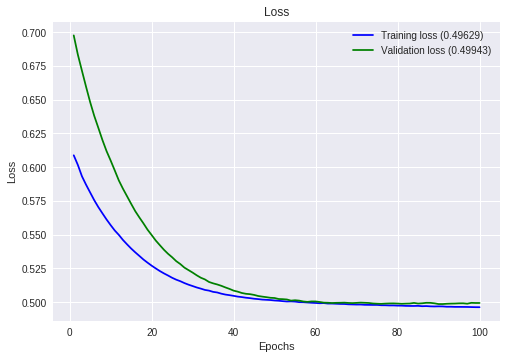

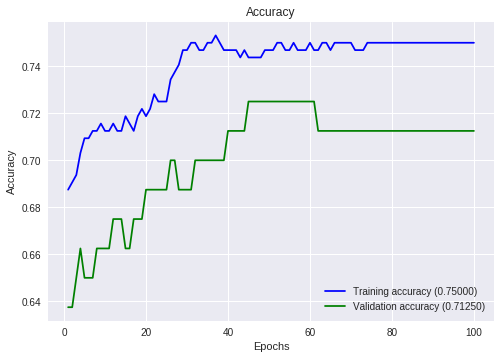

In [0]:
plot_history(history)

### 5 a) Look at the generated first chart. What is (approximately) the minimum value that the validation loss obtained during training?

*From the first chart the minimum validation loss obtained during training appears to be about 0.5000 (green line).*

Let us try to display the predictions using matplotlib:

['red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red']


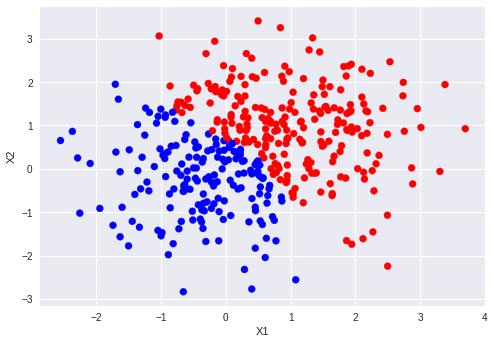

In [0]:
Ypred = model.predict_classes(X)
cols2 = ['blue' if a == 0 else 'red' for a in Ypred]
print(cols2[0:10])
plt.figure(1)
plt.scatter(X[:,0],X[:,1],c=cols2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

##  6. Improve Model





a) Insert a second hidden layer a densely connected neural network layer with 10 units (aka neurons aka nodes) to the model defined above. Use the Rectified Linear Unit activation function. Hint: near the beginning of this Python notebook, add two lines of code corresponding to a keras layer called Dense and a keras layer called Activation. Specify the activation function type "relu". Remember to rerun the whole notebook by selecting Runtime->Run all. What is now the approximate mimimum value of the validation loss?

*After adding the two additional layers, the approixmate minimum value of validation loss is only slightly under 0.5000 (between 0.4990-0.4999), so there is no significant change.*

b. Provide a possible reason why first the validation loss decreases during training, but is in this case increasing for high number of generations. 

*When we try to train for more epochs (go through more training in model), the model will begin to learn and recognize specific images in the set. Therefore, over more time it will begin to overfit rather than having the validation.and training losses be roughly equal.*

c) To what number (approximately) should you change the number of epochs in the fit method called above so that the training ends when it corresponds approximately to the minimum of the validation loss (in other words the minimum value of the loss function that the validation data obtained during training)?

*As we see in the epochs generations during the model training in part 4, the lowest validation loss is generated around 76 epochs. Therefore, the epochs in the fit method should be changed to some number roughly around 76.*

Additional lines for first part of question six are added in the first chunk of code near setting random seed as shown in example colab notebook.